In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

e:\Installation\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
e:\Installation\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_excel("DengueData2022.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'DengueData2022.xlsx'

In [ ]:
data.head()

,Day,Affected
0,1,9
1,2,19
2,3,16
3,4,13
4,5,14


In [ ]:
df = data

In [ ]:
data = data[:-17]

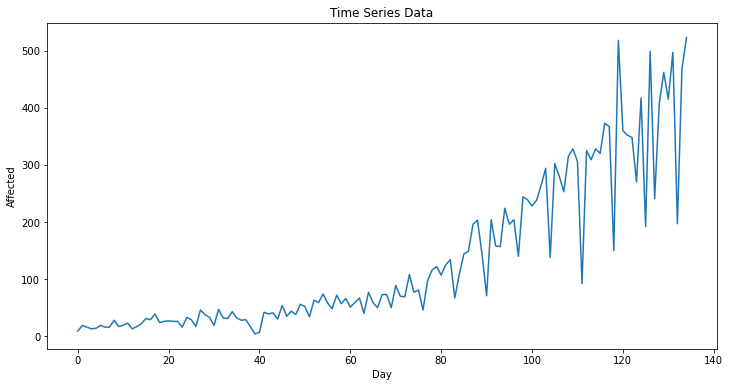

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Affected'])
plt.title('Time Series Data')
plt.xlabel('Day')
plt.ylabel('Affected')
plt.show()

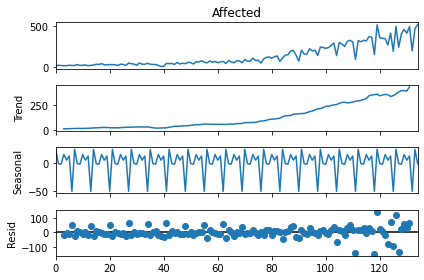

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data['Affected'], model='additive',period=7)
decomposition.plot()
plt.show()

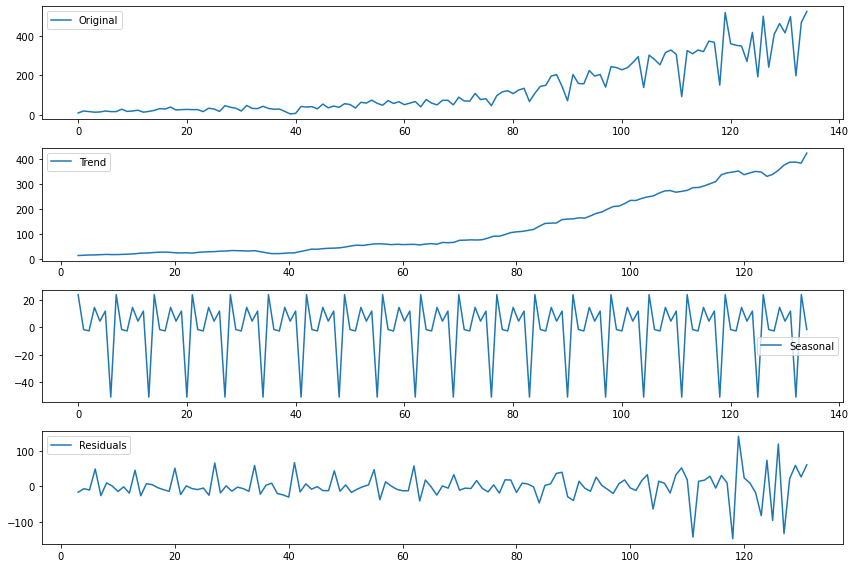

In [ ]:
plt.figure(figsize=(12, 8))

# Original Time Series
plt.subplot(4, 1, 1)
plt.plot(data['Affected'], label='Original')
plt.legend(loc='best')

# Trend Component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

# Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')

# Residuals
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data['Affected'])
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
print('Result: The data is' + (' not' if adf_test[1] > 0.05 else '') + ' stationary.')

ADF Statistic: 3.808524182860594
p-value: 1.0
Result: The data is not stationary.


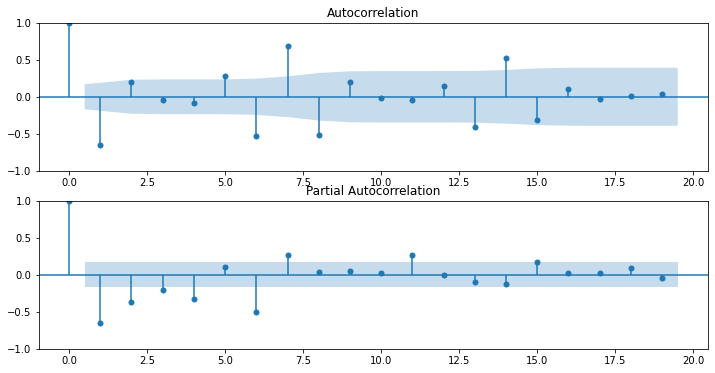

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
data_diff = data['Affected'].diff().dropna()
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(data_diff, lags=19, ax=plt.gca())
plt.subplot(212)
plot_pacf(data_diff, lags=19, ax=plt.gca())
plt.show()

In [ ]:
p = 1
d = 1
q = 1

In [ ]:
model = ARIMA(data['Affected'], order=(p, d, q))
results = model.fit()

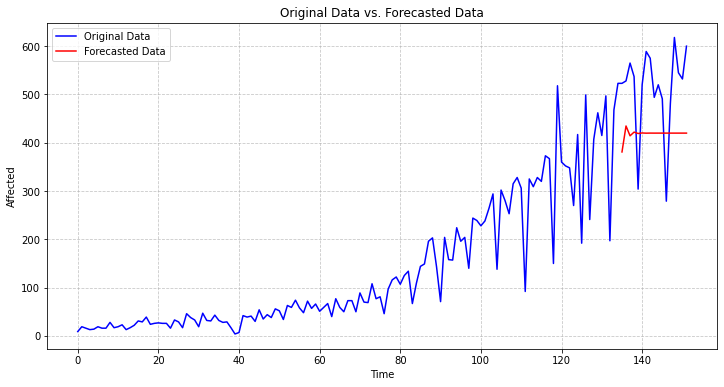

In [ ]:
forecast_steps = 17
forecasted_values= results.forecast(steps=forecast_steps)

actual_values = df['Affected'].values


x_axis = range(len(actual_values))

plt.figure(figsize=(12, 6))
plt.plot(x_axis, actual_values, label='Original Data', color='blue')
plt.xlabel('Time')
plt.ylabel('Affected')
plt.title('Original Data vs. Forecasted Data')
plt.grid(True, linestyle='--', alpha=0.7)

forecast_x_axis = range(data.shape[0] , data.shape[0]+forecast_steps)
plt.plot(forecast_x_axis, forecasted_values, label='Forecasted Data', color='red')
plt.legend()

plt.show()

In [ ]:

from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(df['Affected'][135:], forecasted_values)
print('Test MSE: %.3f' % mse)

rmse = sqrt(mean_squared_error(df['Affected'][135:], forecasted_values))
print('Test RMSE: %.3f' % rmse)

Test MSE: 16744.121
Test RMSE: 129.399


In [ ]:
forecasted_values.shape

(17,)

In [ ]:
# actual_values[:-100].shape

In [ ]:
# df['Affected'][100:].shape

In [ ]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(df['Affected'][135:], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=98.016, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=95.569, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.04 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=99.267, Time=0.01 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=inf, Time=0.13 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=97.506, Time=0.13 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=inf, Time=0.05 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=96.460, Time=0.02 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=97.565, Time=0.04 sec
 ARIMA(1,1,1)(1,1,0)[7]             : AIC=97.567, Time=0.07 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=96.544, Time=0.04 sec
 ARIMA(2,1,1)(1,1,0)[7]             : AIC=inf, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[7] intercept   : AIC=inf, Time=0.04 sec

Best model:  ARIM

In [ ]:
stepwise_model.fit(df['Affected'][135:])

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(1, 1, 0, 7),
      suppress_warnings=True, with_intercept=False)

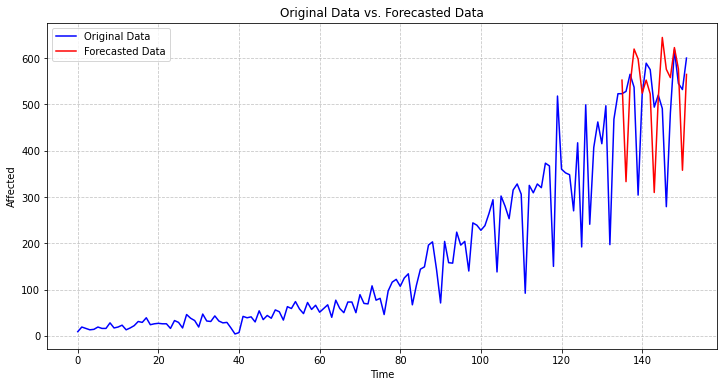

In [ ]:
future_forecast = stepwise_model.predict(n_periods=17)

plt.figure(figsize=(12, 6))
plt.plot(x_axis, actual_values, label='Original Data', color='blue')
plt.xlabel('Time')
plt.ylabel('Affected')
plt.title('Original Data vs. Forecasted Data')
plt.grid(True, linestyle='--', alpha=0.7)

forecast_x_axis = range(data.shape[0] , data.shape[0]+forecast_steps)
plt.plot(forecast_x_axis, future_forecast, label='Forecasted Data', color='red')
plt.legend()
plt.show()

In [ ]:

from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(df['Affected'][135:], forecasted_values)
print('Test MSE: %.3f' % mse)

rmse = sqrt(mean_squared_error(df['Affected'][135:], forecasted_values))
print('Test RMSE: %.3f' % rmse)

Test MSE: 16744.121
Test RMSE: 129.399
